## 국회의원 현황정보 수집/분석/시각화/저장
- 국회 의원현황
- 이름과 ID 추출
- 상세페이지 정보 추출 (json으로 저장)
- 상세정보들을 DataFrame으로 변환
- 시각화(막대그래프,히스토그램, 파이챠트, 히트맵)
- 테이블로 저장

In [18]:
import requests
from bs4 import BeautifulSoup
import re

headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'
}

id_list_300 = []
for index in range(1,5): # 1 ~ 30
    url = f'https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex={index}'
    print(url)
    res = requests.get(url, headers=headers)
    #print(res.status_code)
    if res.ok:
        #print(res.json()['resultList'])
        id_list_10 = []
        for member in res.json()['resultList']:
            #print(member['openNaId'])
            id_list_10.append(member['openNaId']) 
        
        #print(id_list_10)
        id_list_300.extend(id_list_10)
    else:
        print(res.status_code)
print(len(id_list_300))
print(id_list_300)

https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=1
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=2
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=3
https://www.assembly.go.kr/portal/cnts/cntsNaas/findNaasThx01.json?pageIndex=4
40
['KANGKYUNGSOOK', 'KANGDAESIK', 'KANGDEUKGU', 'KANGMYOUNGGU', 'KANGMINKUK', 'KANGSUNYOUNG', 'KANGSUNWOO', 'KangSeungKyoo', 'KANGYUJUNG', 'KANGJUNHYEON', 'KANGHOONSIK', 'KOHDONGJIN', 'KOMINJUNG', 'KWAKKYUTAEK', 'KWAKSANGEON', 'KUJAKEUN', 'KWEONSEONGDONG', 'KWONYOUNGSE', 'KwonYoungJin', 'KWONCHILSEUNG', 'KWONHYANGYUP', 'KIMGUNN', 'KIMKYOHEUNG', 'KIMKIWOONG', 'KIMGIPYO', 'KIMGIHYEON', 'KIMNAMGEUN', 'KIMNAMHEE', 'KIMDAISIK', 'KIMDOEUP', 'KIMDONGAH', 'KIMMOONSOO', 'KIMMIAE', 'KIMMINSEOK', 'KIMMEENGEON', 'KIMBYUNGKEE', 'KIMBYUNGJOO', 'KIMSANGWOOK', 'KIMSANGHOON', 'KIMSEOKKI']


#### Json 일부 데이터와 웹페이지의 상세정보 데이터 가져오기

In [23]:
import requests
from bs4 import BeautifulSoup
import re
from urllib.parse import urljoin

print('===> 스크래핑 시작')
#297명의 정보를 저장하는 List
member_detail_list = []

headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'
}

for idx,member in enumerate(member_list_300,1):
    mem_sub_link = member['mLinkUrl']
    detail_url = f'https://www.assembly.go.kr{mem_sub_link}'
    res = requests.get(detail_url, headers=headers)
    print(res.ok, idx, detail_url)
    
    if res.ok:
        # 응답값의 텍스트를 추출
        soup = BeautifulSoup(res.text, 'html.parser')
        
        #1명의 정보를 저장하는 dict 선언
        member_detail_dict = {}
        #li:nth-of-type(n+4): 이 <ul> 아래에 있는 자식 <li> 중 4번째부터 이후 모든 li 선택
        li_tags = soup.select('ul.list li:nth-of-type(n+4)')
        #print(li_tags)
        # for li in li_tags:
        #     print(type(li.find('dt')))
        #     print(li.find('dt').text)
        
        # https://www.assembly.go.kr/members/22nd/KANGKYUNGSOOK 예시
        dt_list = [li_tag.find('dt').text for li_tag in li_tags]
        #print(dt_list)

        #dd_list = ['02-784-8551', '의원회관838호', 'http://blog.naver.com/hwanghee67', 'hwanghee6728@gmail.com', '나성채,조주연', '김병기,정대중', '오상혁,나유경,김용대,문경림', '']
        dd_list = []        
        for li_tag in li_tags:
            dd_tag = li_tag.find('dd')
            pattern = re.compile(f'[\n\r\t]') #문자열에서 줄바꿈, 캐리지 리턴, 탭 문자 중 하나라도 포함되어 있으면 매칭
            dd_text = pattern.sub('',dd_tag.text.strip()).replace(" ","") #dd_tag.text에서 특정 공백 문자들을 제거하고, 나중엔 띄어쓰기까지 없애는 작업
            dd_list.append(dd_text)
        #print(dd_list)
        
        #dt_list와 dd_list를 쌍(pair) 으로 묶어줌, key vlaue 느낌
        '''
        member_detail_dict
        ={'사무실 전화': '02-784-5601', '사무실 호실': '의원회관515호', '개별 홈페이지': 'https://blog.naver.com/grace6752', '이메일': 'gracesook52@rebuildingk.kr', '보좌관': '김재삼,서용선', '선임비서관': '김홍,오세령', '비서관': '권혁,박문혁,김예닮,이경열,김희경', '의원실 안내': ''}
        '''
        member_detail_dict = dict(zip(dt_list, dd_list))
        
        member_detail_dict['이름'] = member['hgNm']        
        member_detail_dict['정당'] = member['polyNm']
        member_detail_dict['성별'] = member['sexGbnNm']
        member_detail_dict['선거구'] = member['origNm']
        member_detail_dict['지역비례'] = member['electGbnNm']

        sosok = member['cmitNm']
        if sosok is not None:
            idx = sosok.find(',')
            if idx > -1:            
                #쉼표가 존재하면, 첫 번째 위원회만 저장함. 예: '정무위원회,운영위원회' → '정무위원회'
                member_detail_dict['소속위원회'] = sosok[:idx]
            else:
                member_detail_dict['소속위원회'] = sosok
        else:        
            member_detail_dict['소속위원회'] = ''    

        print(member_detail_dict['소속위원회'])                        
        
        member_detail_dict['당선횟수'] = member['reeleGbnNm']
        
        img_sub_url = member['mThumbImgUrl']
        '''
        detail_url = 'https://www.assembly.go.kr/members/22nd/KANGKYUNGSOOK',
        img_sub_url = '/static/portal/img/openassm/new/thumb/68f83caf0c9e4546b1694ead863f45ce.jpg'

        => https://www.assembly.go.kr/static/portal/img/openassm/new/thumb/68f83caf0c9e4546b1694ead863f45ce.jpg 

        절대 경로로 변경해준다.
        '''
        img_url = urljoin(detail_url,img_sub_url)
        #print(img_url)
        member_detail_dict['이미지'] = img_url
        
        #print(member_detail_dict)        
                        
        #1명의 정보가 저장된 dict를 list에 추가하기
        member_detail_list.append(member_detail_dict)
    else:
        print(res.status_code)
        
print(len(member_detail_list))
#print(member_detail_list[298:])
print('===> 스크래핑 끝')

===> 스크래핑 시작
True 1 https://www.assembly.go.kr/members/22nd/KANGKYUNGSOOK
교육위원회
True 2 https://www.assembly.go.kr/members/22nd/KANGDAESIK
국방위원회
True 3 https://www.assembly.go.kr/members/22nd/KANGDEUKGU
기후위기 특별위원회
True 4 https://www.assembly.go.kr/members/22nd/KANGMYOUNGGU
국회운영위원회
True 5 https://www.assembly.go.kr/members/22nd/KANGMINKUK
정무위원회
True 6 https://www.assembly.go.kr/members/22nd/KANGSUNYOUNG
국방위원회
True 7 https://www.assembly.go.kr/members/22nd/KANGSUNWOO
보건복지위원회
True 8 https://www.assembly.go.kr/members/22nd/KangSeungKyoo
산업통상자원중소벤처기업위원회
True 9 https://www.assembly.go.kr/members/22nd/KANGYUJUNG
국회운영위원회
True 10 https://www.assembly.go.kr/members/22nd/KANGJUNHYEON
정무위원회
True 11 https://www.assembly.go.kr/members/22nd/KANGHOONSIK
정무위원회
True 12 https://www.assembly.go.kr/members/22nd/KOHDONGJIN
산업통상자원중소벤처기업위원회
True 13 https://www.assembly.go.kr/members/22nd/KOMINJUNG
교육위원회
True 14 https://www.assembly.go.kr/members/22nd/KWAKKYUTAEK
법제사법위원회
True 15 https://www.assembly.go.kr/membe

KeyboardInterrupt: 

In [31]:
import requests
from bs4 import BeautifulSoup
import re
from urllib.parse import urljoin

print('===> 스크래핑 시작')
#297명의 정보를 저장하는 List
member_detail_list = []

headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36'
}

for idx,mem_id in enumerate(id_list_300,1):
    detail_url = f'https://www.assembly.go.kr/members/22st/{mem_id}'
    res = requests.get(detail_url, headers=headers)
    #print(res.ok, idx, detail_url)
    
    if res.ok:
        soup = BeautifulSoup(res.text, 'html.parser')
        
        #1명의 정보를 저장하는 dict 선언
        member_detail_dict = {}
        dt_list = [dt_tag.text for dt_tag in soup.select('ul.list li dt')]
        #print(dt_list)
        
        dd_list = []        
        for dd_tag in soup.select('ul.list li dd'):
            pattern = re.compile(f'[\n\r\t]')
            dd_text = pattern.sub('',dd_tag.text.strip()).replace(" ","")
            dd_list.append(dd_text)
        #print(dd_list)
        '''
        ds_list = ['선거구', '소속위원회', '당선횟수', '사무실 전화', '사무실 호실', '개별 홈페이지', '이메일', '보좌관', '선임비서관', '비서관', '의원실 안내']
        dd_list = ['비례대표', '교육위원회', '초선(제22대)2024.05.30~제22대국회의원', '02-784-5601', '의원회관515호', 'https://blog.naver.com/grace6752', 'gracesook52@rebuildingk.kr', '김재삼,서용선', '김홍,오세령', '권혁,박문혁,김예닮,이경열,김희경', '']
        member_detail_dict = {'선거구': '비례대표', '소속위원회': '교육위원회', '당선횟수': '초선(제22대)2024.05.30~제22대국회의원', '사무실 전화': '02-784-5601', '사무실 호실': '의원회관515호', '개별 홈페이지': 'https://blog.naver.com/grace6752', '이메일': 'gracesook52@rebuildingk.kr', '보좌관': '김재삼,서용선', '선임비서관': '김홍,오세령', '비서관': '권혁,박문혁,김예닮,이경열,김희경', '의원실 안내': ''}
        '''
        member_detail_dict = dict(zip(dt_list, dd_list))
        #print(member_detail_dict)
        
        # <strong>홍길동 (洪吉童)</strong>
        name = soup.select_one('div.mamber_name').text
        #print(name.split(' ')[0])
        member_detail_dict['이름'] = name.split(' ')[0] #['박주민','(朴柱民)']
        
        ## 나이는 없어짐
        # span_tag_age = soup.select_one('div.intro p.tit span.sm span')
        # member_detail_dict['생년월일'] = span_tag_age.text
        
        spanimg_tag = soup.select('span.img-set span.img')
        if spanimg_tag:
            style_url = spanimg_tag[0]['style']
            start_idx = style_url.find("(")+1
            end_idx = style_url.find(")")
            img_sub_url = style_url[start_idx:end_idx].replace("'","")
            img_url = urljoin(detail_url,img_sub_url)
            #print(img_url)
            member_detail_dict['이미지'] = img_url
        
        dd_tag_party = soup.select_one('div.member_assem_dang')
        member_detail_dict['정당'] =  dd_tag_party.text
                
        #1명의 정보가 저장된 dict를 list에 추가하기
        member_detail_list.append(member_detail_dict)
    else:
        print(res.status_code)
        
print(len(member_detail_list))        
print('===> 스크래핑 끝')

===> 스크래핑 시작
40
===> 스크래핑 끝


In [32]:
import json

with open('data/member.json','w') as file:
    json.dump(member_detail_list, file)

In [33]:
import pandas as pd

member_json_df = pd.read_json('data/member.json')
print(member_json_df.shape)
member_json_df.head(2)

(40, 14)


,선거구,소속위원회,당선횟수,사무실 전화,사무실 호실,개별 홈페이지,이메일,보좌관,선임비서관,비서관,의원실 안내,이름,이미지,정당
0,비례대표,교육위원회,초선(제22대)2024.05.30~제22대국회의원,02-784-5601,의원회관515호,https://blog.naver.com/grace6752,gracesook52@rebuildingk.kr,"김재삼,서용선","김홍,오세령","권혁,박문혁,김예닮,이경열,김희경",,\n강경숙(姜景淑)\n,https://www.assembly.go.kr/static/portal/img/o...,\n\t\t\t\t\t\t\t조국혁신당\n\t\t\t\t\t\t
1,대구동구군위군을,국방위원회,"재선(제21대,제22대)2024.05.30~제22대국회의원2020.05.30~202...",02-784-5275,의원회관341호,,kds21341@naver.com,"박홍규,유진영","김기일,이기백","박순권,김현정,황인택,박동혁,이정은",,\n강대식(姜大植)\n,https://www.assembly.go.kr/static/portal/img/o...,\n\t\t\t\t\t\t\t국민의힘\n\t\t\t\t\t\t


In [ ]:
import pandas as pd

member_df = pd.DataFrame(columns=['이름','정당','생년월일','당선횟수','선거구','소속위원회','이미지','사무실 전화','사무실 호실',\
                                  '의원 홈페이지','개별 홈페이지','이메일','보좌관','선임비서관','비서관','의원실 안내'])

for member_detail in member_detail_list:
    #pd.DataFrame.from_records([member_detail]): 이 딕셔너리를 한 줄짜리 DataFrame으로 변환.
    df_new_row = pd.DataFrame.from_records([member_detail])
    #pd.concat([...]): 기존 member_df에 새 행을 하나씩 붙이는 방식.
    member_df = pd.concat([member_df, df_new_row])
    
    #series_obj = pd.Series(member_detail)
    # Series 객체를 append 
    #member_df = member_df.append(series_obj, ignore_index=True)
    
member_df.head(2)

,이름,정당,생년월일,당선횟수,선거구,소속위원회,이미지,사무실 전화,사무실 호실,의원 홈페이지,개별 홈페이지,이메일,보좌관,선임비서관,비서관,의원실 안내
0,\n강경숙(姜景淑)\n,\n\t\t\t\t\t\t\t조국혁신당\n\t\t\t\t\t\t,NaN,초선(제22대)2024.05.30~제22대국회의원,비례대표,교육위원회,https://www.assembly.go.kr/static/portal/img/o...,02-784-5601,의원회관515호,NaN,https://blog.naver.com/grace6752,gracesook52@rebuildingk.kr,"김재삼,서용선","김홍,오세령","권혁,박문혁,김예닮,이경열,김희경",
0,\n강대식(姜大植)\n,\n\t\t\t\t\t\t\t국민의힘\n\t\t\t\t\t\t,NaN,"재선(제21대,제22대)2024.05.30~제22대국회의원2020.05.30~202...",대구동구군위군을,국방위원회,https://www.assembly.go.kr/static/portal/img/o...,02-784-5275,의원회관341호,NaN,,kds21341@naver.com,"박홍규,유진영","김기일,이기백","박순권,김현정,황인택,박동혁,이정은",


In [35]:
member_df.shape

(40, 16)

In [37]:
import numpy as np

#index 변경, 이걸 통해 인덱스를 기존의 0부터 시작하는 숫자가 아니라 1부터 시작하는 인덱스로 바꾸는 것
member_df.index = np.arange(1, len(member_df)+1)
member_df.index

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40],
      dtype='int64')

In [40]:
member_df.head(2)

,이름,정당,생년월일,당선횟수,선거구,소속위원회,이미지,사무실 전화,사무실 호실,의원 홈페이지,개별 홈페이지,이메일,보좌관,선임비서관,비서관,의원실 안내
1,\n강경숙(姜景淑)\n,\n\t\t\t\t\t\t\t조국혁신당\n\t\t\t\t\t\t,NaN,초선(제22대)2024.05.30~제22대국회의원,비례대표,교육위원회,https://www.assembly.go.kr/static/portal/img/o...,02-784-5601,의원회관515호,NaN,https://blog.naver.com/grace6752,gracesook52@rebuildingk.kr,"김재삼,서용선","김홍,오세령","권혁,박문혁,김예닮,이경열,김희경",
2,\n강대식(姜大植)\n,\n\t\t\t\t\t\t\t국민의힘\n\t\t\t\t\t\t,NaN,"재선(제21대,제22대)2024.05.30~제22대국회의원2020.05.30~202...",대구동구군위군을,국방위원회,https://www.assembly.go.kr/static/portal/img/o...,02-784-5275,의원회관341호,NaN,,kds21341@naver.com,"박홍규,유진영","김기일,이기백","박순권,김현정,황인택,박동혁,이정은",


In [39]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 1 to 40
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   이름       40 non-null     object
 1   정당       40 non-null     object
 2   생년월일     0 non-null      object
 3   당선횟수     40 non-null     object
 4   선거구      40 non-null     object
 5   소속위원회    40 non-null     object
 6   이미지      40 non-null     object
 7   사무실 전화   40 non-null     object
 8   사무실 호실   40 non-null     object
 9   의원 홈페이지  0 non-null      object
 10  개별 홈페이지  40 non-null     object
 11  이메일      40 non-null     object
 12  보좌관      40 non-null     object
 13  선임비서관    40 non-null     object
 14  비서관      40 non-null     object
 15  의원실 안내   40 non-null     object
dtypes: object(16)
memory usage: 5.3+ KB


In [41]:
#선거구2 컬럼을 새로 추가
#경남창원시성산구 -> 경남
print(type(member_df['선거구']))
print(type(member_df['선거구'].str))
#Series객체를 StringMethods 객체로 변환(문자열 슬라이싱을 하기 위해서)
temp_str = member_df['선거구'].str
#2글자 슬라이싱 값을 선거구2 라는 컬럼으로 저장
member_df['선거구2'] = temp_str[:2]

member_df.loc[0:3,['선거구','선거구2']]

<class 'pandas.core.series.Series'>
<class 'pandas.core.strings.accessor.StringMethods'>


,선거구,선거구2
1,비례대표,비례
2,대구동구군위군을,대구
3,경기안양시만안구,경기


In [42]:
member_df['선거구2'].value_counts()

선거구2
서울    9
비례    5
경기    5
대구    4
부산    4
경북    3
충남    2
전남    2
울산    2
경남    1
세종    1
강원    1
인천    1
Name: count, dtype: int64

In [43]:
member_df['이미지'].tail()

36    https://www.assembly.go.kr/static/portal/img/o...
37    https://www.assembly.go.kr/static/portal/img/o...
38    https://www.assembly.go.kr/static/portal/img/o...
39    https://www.assembly.go.kr/static/portal/img/o...
40    https://www.assembly.go.kr/static/portal/img/o...
Name: 이미지, dtype: object

In [44]:
%matplotlib inline

In [45]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import seaborn as sns

In [46]:
# font name을 알고 있다면 생략가능
#한글폰트 path 설정
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
#font의 파일정보로 font name 을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_prop)
print(font_prop)

AppleGothic


In [47]:
member_df['정당'].value_counts()

정당
\n\t\t\t\t\t\t\t국민의힘\n\t\t\t\t\t\t      21
\n\t\t\t\t\t\t\t더불어민주당\n\t\t\t\t\t\t    18
\n\t\t\t\t\t\t\t조국혁신당\n\t\t\t\t\t\t      1
Name: count, dtype: int64

In [48]:
member_df['정당'].value_counts().index

Index(['\n\t\t\t\t\t\t\t국민의힘\n\t\t\t\t\t\t',
       '\n\t\t\t\t\t\t\t더불어민주당\n\t\t\t\t\t\t',
       '\n\t\t\t\t\t\t\t조국혁신당\n\t\t\t\t\t\t'],
      dtype='object', name='정당')

<Axes: xlabel='당선횟수', ylabel='count'>

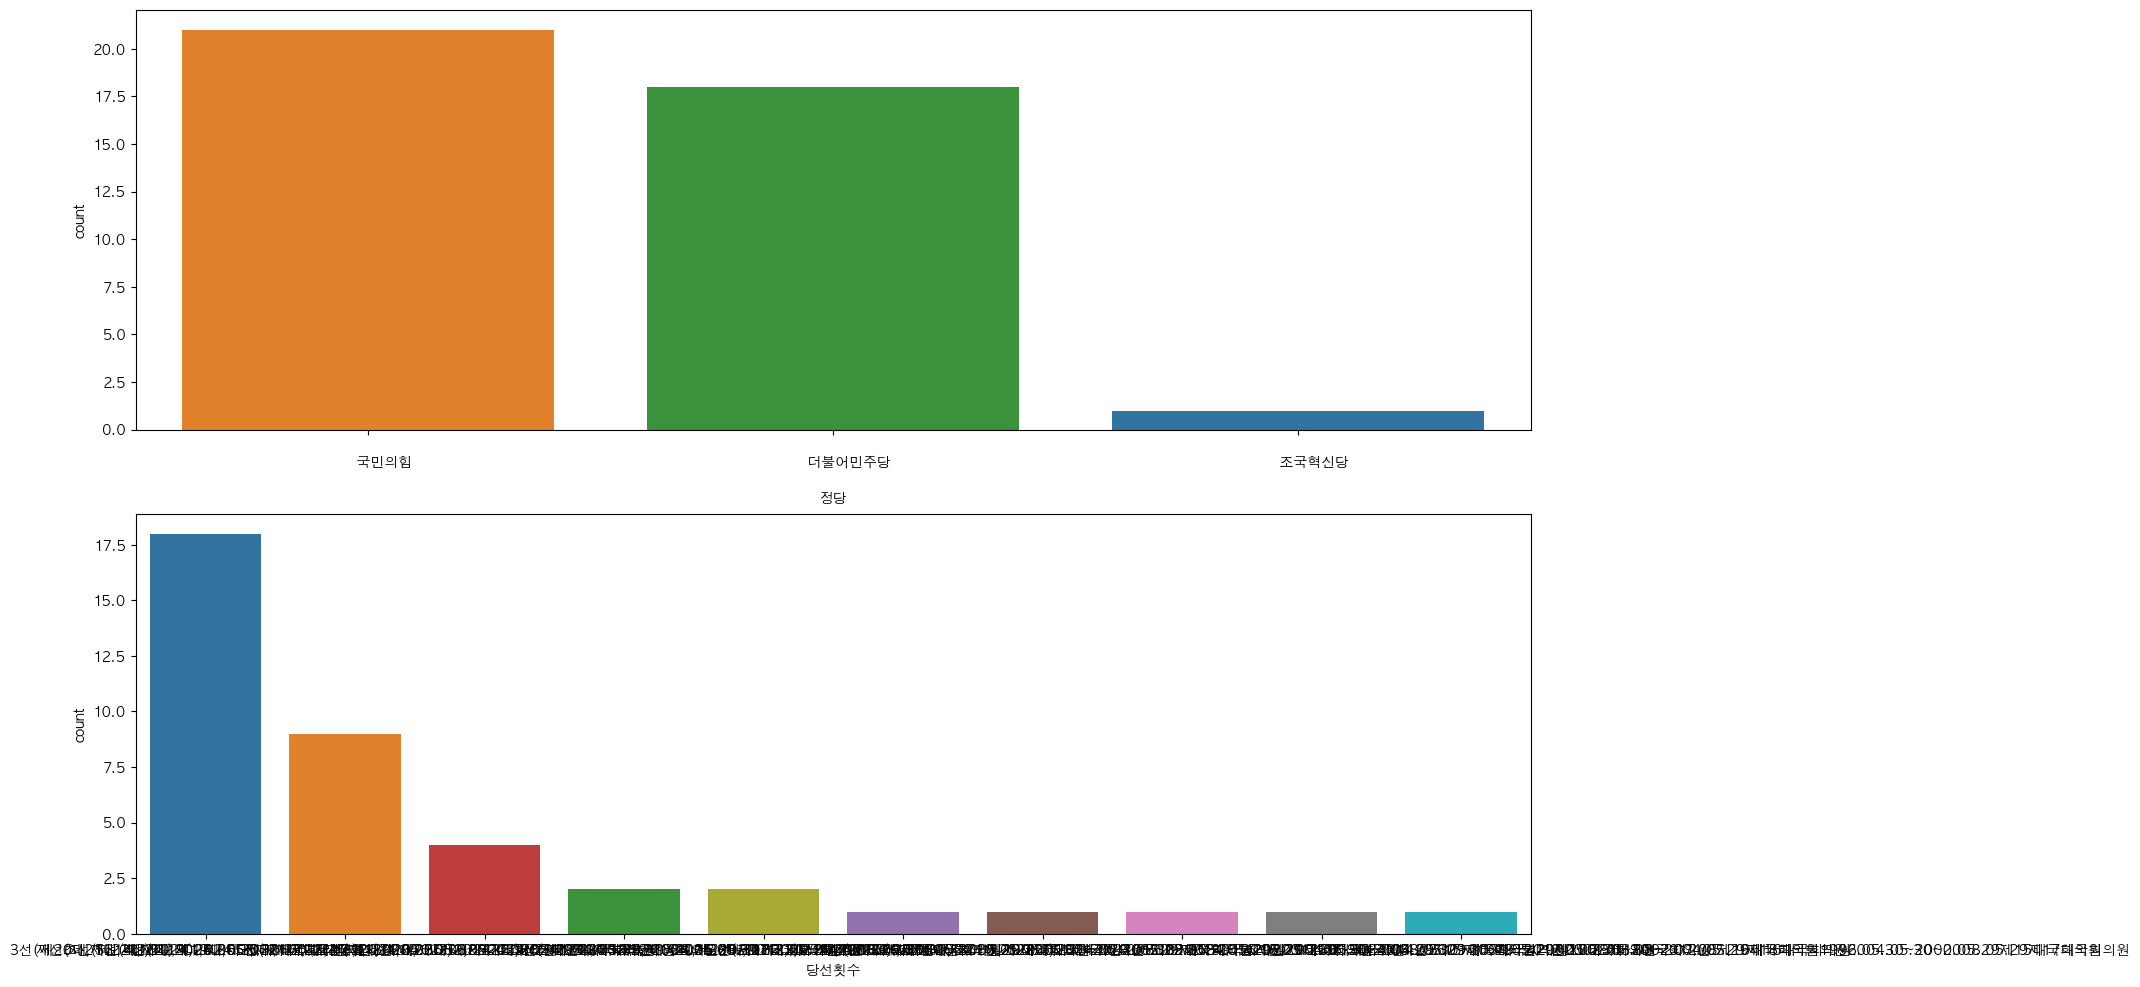

In [52]:
figure, (axes1,axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)

sns.countplot(data=member_df, x='정당', ax=axes1, order=member_df['정당'].value_counts().index, hue='정당')
sns.countplot(data=member_df, x='당선횟수', ax=axes2, order=member_df['당선횟수'].value_counts().index,hue='당선횟수')

<Axes: xlabel='count', ylabel='선거구2'>

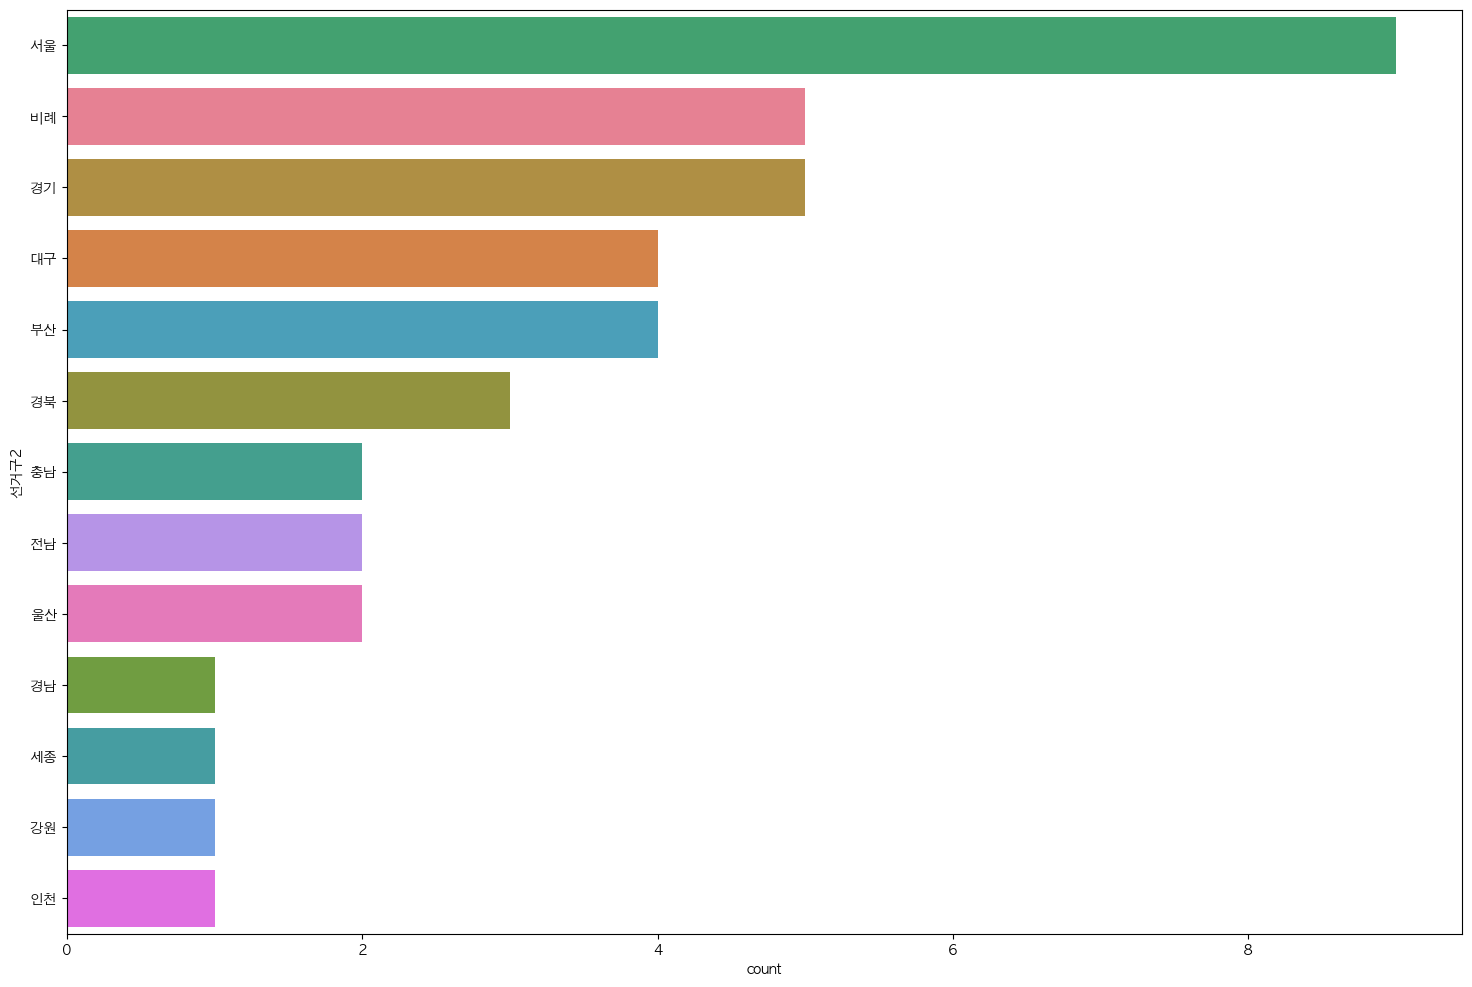

In [53]:
#선거구2 컬럼을 값으로  countplot 그리기
figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
sns.countplot(data=member_df, y='선거구2', ax=axes1, order=member_df['선거구2'].value_counts().index,hue='선거구2')